# Question 1:
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


In [20]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline #Displays plots in notebook

In [47]:
#Read in our Sneaker  shops Dataset
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [7]:
#Let's have a look at the data
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


* A glance at the data description above also confirms the same Average ( or mean) order amount (AOV) of 3145.13 dollars for the 30 day period. 
* Taking a closer look at the order amount column, we can see that more than 75% of the customer ordered at most 3 sneakers at in one order at a price below 400 dollars per order during the period. 
* This tells us that we might have some outliers in our data that do not represent the typical customer and hence our calculated average might not be representative of the data set

<AxesSubplot:>

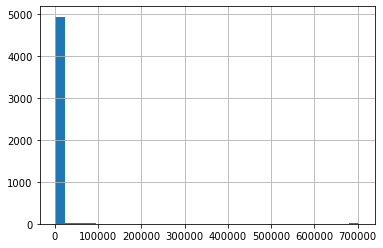

In [44]:
#Let's visually confirm our data distribution for outliers with a few plots
data['order_amount'].hist(bins = 30) # plots histogram of order amount

<AxesSubplot:>

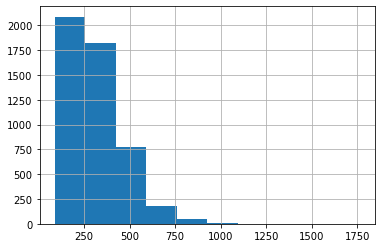

In [37]:
# It is clear from the plot above that the vast majority of our order amount are well below $10000. 
# Now we can trim our data by dropping orders below a price amount, say 2,000 dollars, and then compute our Average Order Amount again to see if it made a difference
# 
data_no_outlier = data[data['order_amount']< 2000]
data_no_outlier['order_amount'].hist() #plots histogram of our new order amount column

In [38]:
data_no_outlier.describe() #A descriptive statistics of our data

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


As we can see, we have a much more acceptable Average (or mean) Order value at $302.58 

# Metric for the Dataset:
The metric I would report for this dataset is the average order amount per shop (AOV/shop). Let's find it!! 

In [55]:
# Group Data by Shops, calculate the average order amount and sort the shops from highest AOV to lowest
AOV_per_shop = data.groupby('shop_id')['order_amount'].mean().sort_values(ascending = False).reset_index()

In [56]:
AOV_per_shop.head()

,shop_id,order_amount
0,42,235101.490196
1,78,49213.043478
2,50,403.545455
3,90,403.224490
4,38,390.857143
